In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


EJERCICIO 5.4 
PARTE A:

In [0]:
from numpy import loadtxt, sum, array, linspace, exp, arange, pi, cos, sin, sqrt, empty, log
from math import factorial, tanh, cosh
from pylab import plot, show, xlabel, ylabel, imshow, hot, xlim, ylim, gray

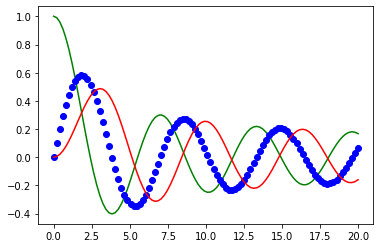

In [6]:
def J(m, x):
  def f(m, x, theta):
    return cos(m*theta - x* sin(theta))

  N = 1000
  a = 0
  b = pi
  h = (b - a) / N
#metod de simpson
  oddSum = 0
  for k in range(1, N, 2):
    oddSum += f(m, x, a + k*h)

  evenSum = 0
  for k in range(1, N, 2):
    evenSum += f(m, x, a + k*h)

  return 1 / pi * 1 / 3 * h * (f(m, x, a) + f(m, x, b) + 4 * oddSum + 2 * evenSum) #retornamos a la integral

#plot(J0, J1, J2)
xpoints = linspace(0, 20, 100) #hace una matris ordenada con un inicio y una terminacion y una total de particiones
J0 = [] #son matrices vacias
J1 = []
J2 = []
for x in xpoints:
  J0.append(J(0, x)) # 
  J1.append(J(1, x))
  J2.append(J(2, x))

plot(xpoints, J0, "g")#para los puntos
plot(xpoints, J1, "ob")
plot(xpoints, J2, "r")
show()


PARTE B:

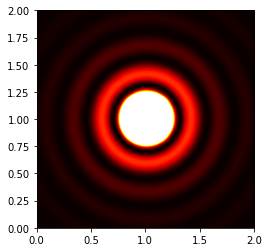

In [7]:
def r(x, y):
  return sqrt(x**2 + y**2)

def I(r):
  if (r == 0):
    return 1/4

  Lambda = 0.5 # en micrómetros
  kr = 2 * pi / Lambda * r
  return (J(1,kr)/ kr)**2

side = 2 # longitud en micrómetros
points = 200 # número de puntos de cuadrícula en cada dirección
spacing = side/points

# Calcule la posición del centro.
xCenter = side/2
yCenter = side/2

# Hacer una matriz vacía para almacenar valores
intensities = empty([points, points], float)

# Calcule los valores en la matriz
for i in range(points):
  y = spacing * i
  for j in range(points):
    x = spacing * j
    dist = r(x - xCenter, y - yCenter)
    intensities[i, j] = I(dist)

imshow(intensities, origin="lower", extent=[0,side,0,side], vmax=0.01)#diseño para los anillos de la grafica
hot()
show()